In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown




  0%|          | 0.00/163M [00:00<?, ?B/s]
  1%|          | 1.00M/163M [00:02<05:33, 510kB/s]
  1%|1         | 2.00M/163M [00:02<02:39, 1.06MB/s]
  2%|1         | 3.00M/163M [00:02<01:37, 1.72MB/s]
  3%|3         | 5.00M/163M [00:02<00:51, 3.21MB/s]
  4%|3         | 6.00M/163M [00:02<00:44, 3.66MB/s]
  4%|4         | 7.00M/163M [00:03<00:41, 3.93MB/s]
  5%|4         | 8.00M/163M [00:03<00:42, 3.85MB/s]
  6%|5         | 9.00M/163M [00:03<00:44, 3.63MB/s]
  6%|6         | 10.0M/163M [00:04<00:45, 3.57MB/s]
  7%|6         | 11.0M/163M [00:04<00:40, 3.92MB/s]
  8%|7         | 13.0M/163M [00:04<00:30, 5.15MB/s]
  9%|8         | 14.0M/163M [00:04<00:28, 5.45MB/s]
  9%|9         | 15.0M/163M [00:04<00:32, 4.75MB/s]
 10%|9         | 16.0M/163M [00:05<00:32, 4.76MB/s]
 10%|#         | 17.0M/163M [00:05<00:33, 4.63MB/s]
 11%|#1        | 18.0M/163M [00:05<00:35, 4.35MB/s]
 12%|#1        | 19.0M/163M [00:05<00:33, 4.49MB/s]
 12%|#2        | 20.0M/163M [00:06<00:31, 4.80MB/s]
 13%|#3        | 22.0

In [3]:
from zipfile import ZipFile

with ZipFile('face-mask-dataset.zip','r') as zip:
    zip.extractall()

## Importing dependencies

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image

In [2]:
with_mask_files=os.listdir('data/with_mask/')
without_mask_files=os.listdir('data/without_mask/')
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [3]:
len(with_mask_files)

3725

In [4]:
len(without_mask_files)

3828

### Labels for two class of images


    0 -> Person without mask
    1 -> Person with mask

In [5]:
# creat Labels

with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [6]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
len(with_mask_labels)

3725

In [8]:
len(without_mask_labels)

3828

In [9]:
labels=with_mask_labels+without_mask_labels
len(labels)

7553

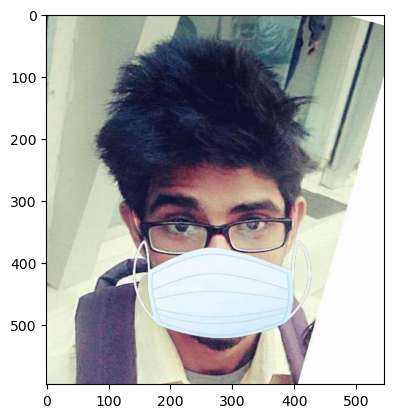

In [10]:
# displaying sample image

img=mpimg.imread('data/with_mask/with_mask_1454.jpg')
plt.imshow(img)

## Image Processing

In [12]:
# converting images to numpy array and resizing it also

with_mask_path='data/with_mask/'
without_mask_path='data/without_mask/'

data=[]


for img_file in with_mask_files:
    
    image=Image.open(with_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
for img_file in without_mask_files:
    image=Image.open(without_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)


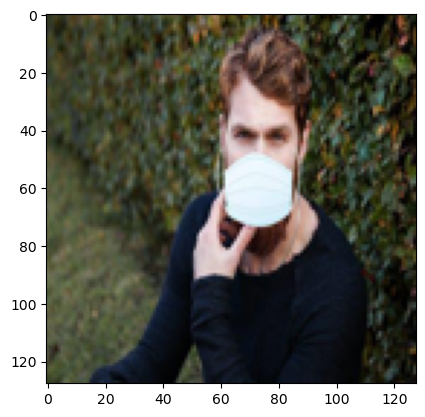

In [18]:
# Creating image list and labels list into array

X=np.array(data)
Y=np.array(labels)

In [25]:
Y.shape

(7553,)

## Train test split

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


## Scaling the data

In [28]:
X_train_Scaled=X_train/255
X_test_Scaled=X_test/255

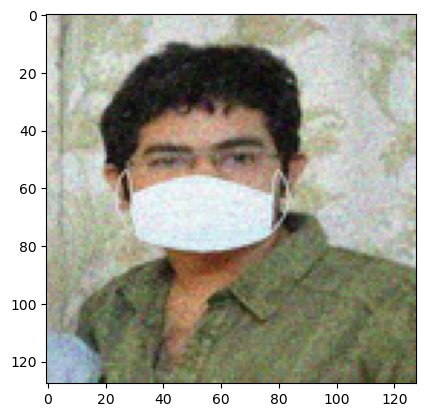

In [31]:
plt.imshow(X_train_Scaled[0])

## Building the CNN 

In [33]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes=2

model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [37]:
# Compling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [38]:
# Trainig the model
history=model.fit(X_train_Scaled,Y_train,validation_split=0.1,epochs=5)


Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 44s 233ms/step - acc: 0.6108 - loss: 0.7531 - val_acc: 0.8380 - val_loss: 0.3527
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 37s 216ms/step - acc: 0.8709 - loss: 0.3332 - val_acc: 0.9157 - val_loss: 0.2339
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 38s 224ms/step - acc: 0.8993 - loss: 0.2545 - val_acc: 0.9256 - val_loss: 0.2236
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 37s 216ms/step - acc: 0.9132 - loss: 0.2166 - val_acc: 0.9306 - val_loss: 0.2130
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 33s 195ms/step - acc: 0.9256 - loss: 0.1913 - val_acc: 0.9207 - val_loss: 0.2331


In [42]:
# Evaluation 

loss,accuracy=model.evaluate(X_test_Scaled,Y_test)
print(loss)
print(accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - acc: 0.9272 - loss: 0.1966
0.20171386003494263
0.9199205636978149


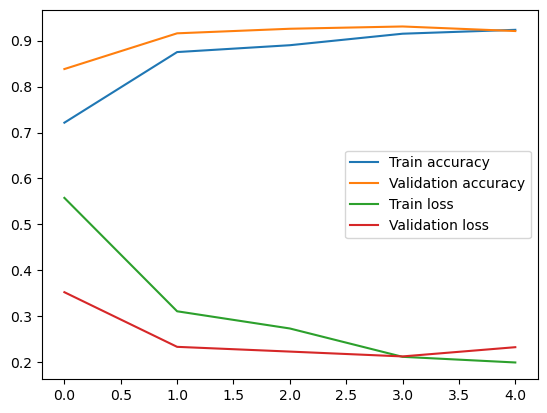

In [45]:
h=history

# plotting accuracy

plt.plot(h.history['acc'],label='Train accuracy')
plt.plot(h.history['val_acc'],label='Validation accuracy')
plt.legend()
plt.plot(h.history['loss'],label='Train loss')
plt.plot(h.history['val_loss'],label='Validation loss')
plt.legend()

## Prediction System

In [54]:
input_image='images.jpeg'
img=mpimg.imread(input_image)

# scale the image

img_resize=cv2.resize(img,(128,128))
img_scaled=img_resize/255
img_reshaped=np.reshape(img_scaled,[1,128,128,3])

prediction =model.predict(img_reshaped)
if np.argmax(prediction)==0:
    print("The person is not wearing a mask")
else:
    print("The person is wearing a mask")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The person is wearing a mask
